In [1]:
import matplotlib
#matplotlib.use('SVG')
import matplotlib.pyplot as plt
import pandas as pd
from neurostim.polarmaps import simple_polar_map
from neurostim.opt_res_analysis import *
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
# format
# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl
# others
dpi=600

In [3]:
stimulation_intensities_mWPERmm2

NameError: name 'stimulation_intensities_mWPERmm2' is not defined

In [4]:
L5_data = pd.read_pickle('../../../data/2022-08-04_L5/all_data.pickle')

In [5]:
L5_data.reset_index()['light_power'].unique()

array([7.e-06, 8.e-06, 9.e-06, 1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05,
       6.e-05, 7.e-05, 8.e-05, 9.e-05, 1.e-04, 2.e-04, 3.e-04, 4.e-04,
       5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04, 1.e-03, 2.e-03, 3.e-03,
       4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03])

/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds"))


stimulation intensity in mW/mm2
5e-05->1.59
0.0001->3.18
0.0003->9.55
0.0005->15.92
0.001->31.83
0.005->159.15


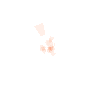

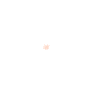

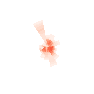

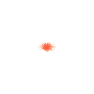

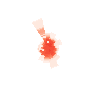

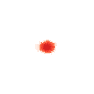

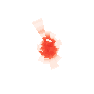

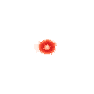

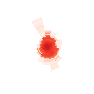

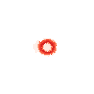

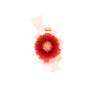

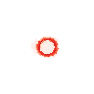

In [7]:
# load datasets
# take L5 from simulations on 2.08.2022
L5_data = pd.read_pickle('../../../data/2022-08-04_L5/all_data.pickle')
L23_data = pd.read_pickle('../../../data/2022-08-04_L23/all_data.pickle')
# select relevant data from data frame
ChR_expr_lvl = 10354945 # this is 130um-2 at soma for uniform distrib
chanrhod_distribution = 'uniform'
# light model and params
light_model = 'foutz_et_al2012'
diam = 200
NA = 0.22 
# other
stim_duration = 200 # ms
# apply selection
L5_data = L5_data.loc['L5',light_model,chanrhod_distribution,
                      ChR_expr_lvl,diam, NA, stim_duration]
L23_data = L23_data.loc['L23',light_model,chanrhod_distribution,
                      ChR_expr_lvl,diam, NA, stim_duration]

# mask all values at 0 to be displayed white
L5_data.loc[L5_data.AP_count==0] = np.nan
L23_data.loc[L23_data.AP_count==0] = np.nan
cmap = matplotlib.cm.get_cmap('Reds')
cmap.set_bad("white")

# which light powers to plot
light_powers = [5e-5, 1e-4, 3e-4, 5e-4, 1e-3, 5e-3]
# print light powers in intensity at emission surface
stimulation_intensities_mWPERmm2 = np.array(light_powers)*1000 / (diam/1000/2)**2 / np.pi # lp[mW]/(radius [mm])**2 / PI
print('stimulation intensity in mW/mm2')
for lp, si in zip(light_powers, stimulation_intensities_mWPERmm2):
    print(str(lp)+'->'+str(np.round(si,2)))

    
for lp in light_powers:
    # L5
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
        data=L5_data.loc[lp].reset_index(),
        plot_col='AP_count',
        cmap= cmap,
        ax=ax,
        vmin=0,
        vmax=28)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid()
    fig.savefig('plots/spatial_response_L5_'+str(lp)+'.svg', dpi=dpi, 
                facecolor='w', edgecolor='w',  
                bbox_inches='tight')
    plt.show()
    
    # L23
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
        data=L23_data.loc[lp].reset_index(),
        plot_col='AP_count',
        cmap= cmap,
        ax=ax,
        vmin=0,
        vmax=28)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid()
    fig.savefig('plots/spatial_response_L23_'+str(lp)+'.svg', dpi=dpi, 
                facecolor='w', edgecolor='w',  
                bbox_inches='tight')
    plt.show()

In [10]:
L23_data.loc

AP_count  firint_rate [Hz]  \
light_power radius [um] angle [rad]                               
0.00001     0           0.000000          NaN               NaN   
                        0.392699          NaN               NaN   
                        0.785398          NaN               NaN   
                        1.178097          NaN               NaN   
                        1.570796          NaN               NaN   
...                                       ...               ...   
0.00500     975         4.319690          NaN               NaN   
                        4.712389          NaN               NaN   
                        5.105088          NaN               NaN   
                        5.497787          NaN               NaN   
                        5.890486          NaN               NaN   

                                     time-to-spike [ms]  
light_power radius [um] angle [rad]                      
0.00001     0           0.000000                    NaN  
                        0.392699                    NaN  
                        0.785398                    NaN  
                        1.178097                    NaN  
                        1.570796                    NaN  
...                                                 ...  
0.00500     975         4.319690                    NaN  
                        4.712389                    NaN  
                        5.105088                    NaN  
                        5.497787                    NaN  
                        5.890486                    NaN  

[14720 rows x 3 columns]

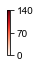

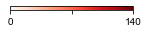

In [9]:
fig, ax = plt.subplots(figsize=(pw/150, pw/8))

ticks_labels_Hz = [str(int(tick)) for tick in np.array(ticks)/(stim_duration/1000)]
cbar = plt.colorbar(mappable, cax=ax, ticks=ticks)
cbar.set_ticklabels(ticks_labels_Hz)
fig.savefig('plots/colobar.png', dpi=dpi, 
            facecolor=None, edgecolor=None,  
            bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(pw/3, pw/100))
ticks = [0,14,28]
ticklabels = [str(0),'',str(140)]
cbar = plt.colorbar(mappable, cax=ax, ticks=ticks, orientation='horizontal')
cbar.set_ticklabels(ticklabels)
fig.savefig('plots/colobarhorizontal.png', dpi=dpi, 
            facecolor=None, edgecolor=None,  
            bbox_inches='tight')
plt.show()

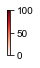

In [7]:
fig, ax = plt.subplots(figsize=(pw/150, pw/8))
ticks = [0,10,20]
ticks_labels_Hz = [str(int(tick)) for tick in np.array(ticks)/(stim_duration/1000)]
cbar = plt.colorbar(mappable, cax=ax, ticks=ticks)
cbar.set_ticklabels(ticks_labels_Hz)
fig.savefig('plots/colobar.png', dpi=dpi, 
            facecolor=None, edgecolor=None,  
            bbox_inches='tight')
plt.show()


In [ ]:
## understand radial axis division on polarplot

In [ ]:
tmp = L5_data.loc[lp].reset_index()
tmp.loc[tmp['radius [um]']>0]

In [ ]:
data = tmp.pivot("angle [rad]","radius [um]","AP_count")

angang, rr = np.meshgrid(
    tmp['angle [rad]'].unique(),
    tmp["radius [um]"].unique(),
    indexing='ij')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='polar')
ax.pcolormesh(angang,rr,data,shading='nearest',cmap='Reds')
plt.show()

In [ ]:
tmp["radius [um]"].unique()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='polar')
angang, rr = np.meshgrid(
    [0,np.pi/2,np.pi,3/2*np.pi],
    [0,1,2,3,4], indexing='ij')
data = [[1,2,1,0,1],
        [1,2,1,0,1],
        [1,2,1,0,1],
        [1,2,1,0,1]]
ax.pcolormesh(angang,rr,data,shading='nearest',cmap='Blues')
#plt.savefig("/home/david/Desktop/test1.png",dpi=300)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='polar')
angang, rr = np.meshgrid(
    [0,np.pi/2,np.pi,3/2*np.pi],
    [0.1,0.4, 0.6,0.8,1.2,1.4, 1.6,1.8,2.2,2.4, 2.6,2.8,3.2,3.4], indexing='ij')
    
data = [
    [  1,  1,   2,  2,  2,  2,   3,  3,  3,  3,   0,  0,  0,  0],
    [  1,  1,   2,  2,  2,  2,   3,  3,  3,  3,   0,  0,  0,  0],
    [  1,  1,   2,  2,  2,  2,   3,  3,  3,  3,   0,  0,  0,  0],
    [  1,  1,   2,  2,  2,  2,   3,  3,  3,  3,   0,  0,  0,  0],
]
#ax.set_rorigin(-1)
ax.pcolormesh(angang,rr,data,shading='nearest',cmap='Blues')
#plt.savefig("/home/david/Desktop/test2.png",dpi=300)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
angang, rr = np.meshgrid(
    [0,np.pi/2,np.pi,3/2*np.pi],
    [0,1,2,3,4], indexing='ij')
data = [[1,2,1,2,1],
        [1,2,1,2,1],
        [1,2,1,2,1],
        [1,2,1,2,1]]
#ax.set_rorigin(1)
ax.pcolormesh(angang,rr,data,shading='nearest')
plt.show()